## 7.5 공분산과 상관계수

다변수 확률변수 간의 상관 관계를 숫자로 나타낸 것이 공분산(covariance)과 상관계수(correlation coefficient)다. 

### 표본공분산

표본공분산(sample covariance)은 다음처럼 정의한다. 여기에서 $x_i$와 $y_i$는 각각 $i$번째의 $x$ 자료와 $y$자료의 값을 가리키고, $\bar{x}$와 $\bar{y}$는 $x$ 자료와 $y$자료의 표본평균을 가리킨다.

$$
\begin{align}
s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})(y_i-\bar{y})
\tag{7.5.1}
\end{align}
$$

표본분산과 마찬가지로 **표본공분산**도 자료가 평균값으로부터 얼마나 떨어져 있는지를 나타낸 것이다. 공분산은 평균값 위치와 표본 위치를 연결하는 사각형의 면적을 사용한다. 다만 공분산의 경우에는 자료의 위치에 따라 이 값의 부호가 달라진다. 데이터가 1사분면이나 3사분면에 있는 경우에는 양수가 되고 데이터가 2사분면이나 4사분면에 있는 경우에는 음수가 된다. 따라서 공분산의 부호는 $X$, $Y$ 데이터가 같은 부호를 가지는지 다른 부호를 가지는지에 대한 지표라고 할 수 있다.

<img src="https://datascienceschool.net/upfiles/79eb48be63cf4a8886299e27864b77bd.png" style="width: 100%;">

그림 7.5.1 : 표본공분산

### 표본상관계수

표본공분산은 평균을 중심으로 각 자료들이 어떻게 분포되어 있는지 크기와 방향성을 같이 보여준다. 그런데 분포의 크기는 공분산이 아닌 분산만으로도 알 수 있기 때문에 대부분의 경우 자료 분포의 방향성만 분리하여 보는 것이 유용하다. 이 때 필요한 것이 **표본상관계수(sample correlation coefficient)**다.

표본상관계수는 다음과 같이 공분산을 각각의 표본표준편차값으로 나누어 정규화(normalize)하여 정의한다.

$$
\begin{align}
r_{xy} = \dfrac{s_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}}
\tag{7.5.2}
\end{align}
$$

이와 다르게 정의한 상관계수도 있기 때문에 다른 종류의 상관계수와 비교하여 말하는 경우에는 **피어슨(Pearson) 상관계수**라고 하기도 한다.

사이파이의 stats 서브패키지는 피어슨 상관계수를 계산하는 `pearsonr()` 함수를 제공한다. `pearsonr()` 함수는 상관계수와 유의확률을 반환한다. 유의확률에 대해서는 9장에서 공부한다.

#### 예제

다음 코드는 붓꽃의 꽃받침의 길이와 꽃잎의 길이 사이의 상관계수를 계산하는 코드다. 상관계수가 약 0.87임을 알 수 있다.

In [2]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

%matplotlib inline
# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [4]:
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭
sp.stats.pearsonr(x1, x3)[0]

0.8717537758865832

#### 연습 문제 7.5.1

붓꽃 데이터에서 다음 상관계수를 계산하라.

(1) 꽃받침의 길이와 꽃받침의 폭 사이의 상관계수

(2) 꽃잎의 길이와 꽃잎의 폭 사이의 상관계수

(3) 꽃받침의 폭과 꽃잎의 폭 사이의 상관계수

In [6]:
print(sp.stats.pearsonr(x1, x2)[0])
print(sp.stats.pearsonr(x3, x4)[0])
print(sp.stats.pearsonr(x2, x4)[0])

-0.11756978413300204
0.962865431402796
-0.3661259325364391


### 확률변수의 공분산과 상관계수

두 확률변수 $X$와 $Y$의 공분산은 기댓값 연산자를 사용하여 다음과 같이 정의된다.

$$
\begin{align}
\text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
\tag{7.5.3}
\end{align}
$$

마찬가지로 두 확률변수 $X$와 $Y$의 상관 계수도 다음과 같이 정의한다.

$$
\begin{align}
\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{Var}[X] \cdot \text{Var}[Y]}}
\tag{7.5.4}
\end{align}
$$

확률변수의 상관계수는 다음과 같은 성질을 가진다.

$$
\begin{align}
-1 \leq \rho \leq 1
\tag{7.5.5}
\end{align}
$$


또한 $\rho$가 -1, 0, 1인 경우를 각각 다음과 같이 부른다.

* $\rho = 1$ : 완전선형 상관관계
* $\rho = 0$ : 무상관 (독립과는 다름)
* $\rho = −1$ : 완전선형 반상관관계


이 상관계수의 부호와 크기가 의미하는 바는 다음 스캐터 플롯에서 알 수 있다. 이 스캐터 플롯은 특정한 상관계수를 가지는 데이터를 시뮬레이션을 통해 그린 것이다. 스캐터 플롯의 위에 쓰여진 숫자는 시뮬레이션에 사용된 상관계수를 나타낸다. 스캐터 플롯의 데이터가 양의 기울기를 가지는 직선 혹은 타원 모양을 가지면 상관계수는 양수이고 음의 기울기를 가지는 직선 혹은 타원 모양이 되면 상관계수가 음이 된다. 또한 직선 모양이 뚜렷할수록 상관계수의 절대값이 커지고 원에 가까워질 수록 절대값이 작아진다.

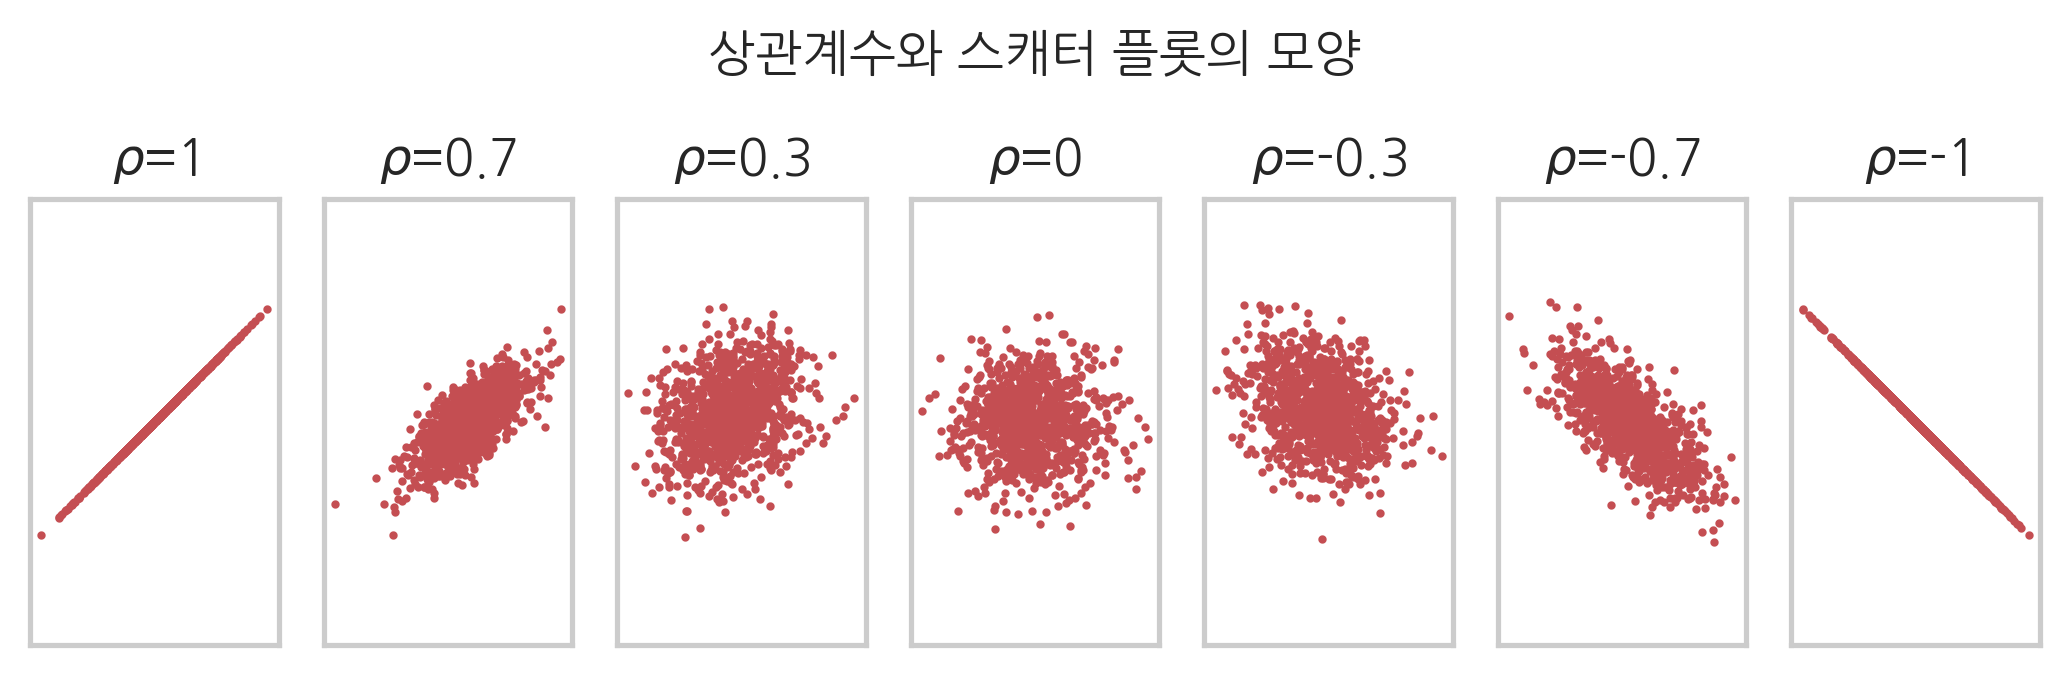

In [2]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$\rho$={}".format(r))

plt.suptitle("상관계수와 스캐터 플롯의 모양", y=1.1)
plt.tight_layout()
plt.show()

또한 상관계수는 스캐터 플롯의 기울기와는 아무런 상관이 없다.

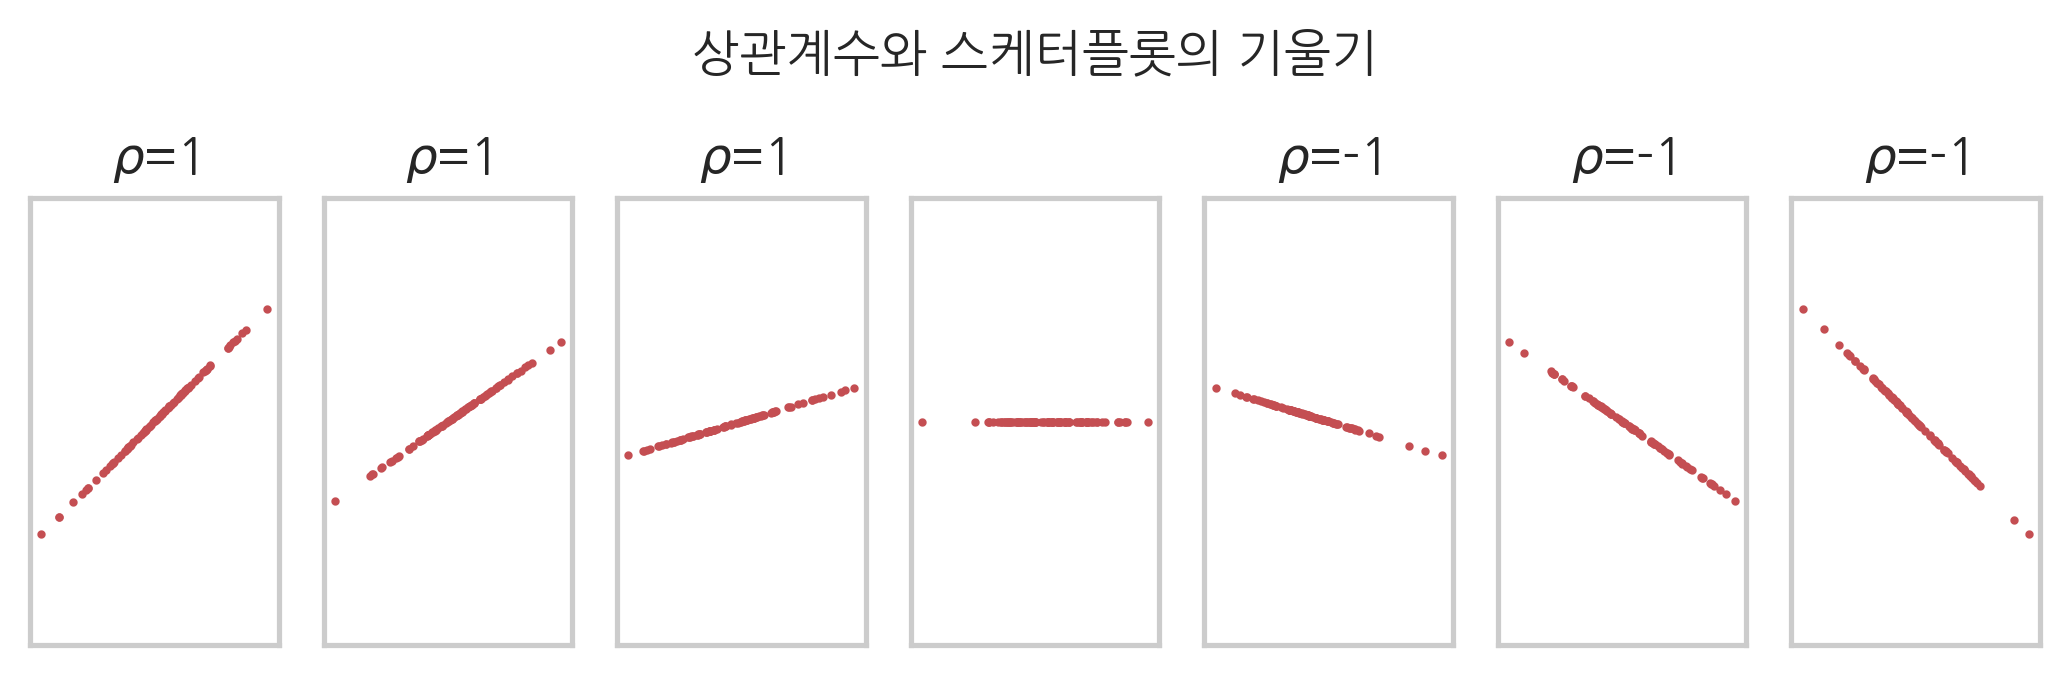

In [3]:
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 2))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(r"$\rho$=1")
    if s < 0:
        plt.title(r"$\rho$=-1")

plt.suptitle("상관계수와 스케터플롯의 기울기", y=1.1)
plt.tight_layout()
plt.show()

#### 연습 문제 7.5.2

(1) 원소의 갯수가 10개인 두 개의 무작위 숫자 벡터를 생성하라. 이 두 벡터가 두 개의 확률변수에서 나온 데이터라고 가정하면 두 확률변수는 독립이어야 한다.

(2) 두 데이터 집합의 표본상관계수를 계산하라. 독립인 확률변수의 상관계수는 0이어야 한다. 표본상관계수의 값도 0인가?

(3) 원소의 갯수를 10,000개로 다시 무작위 숫자 벡터를 생성하고 표본상관계수를 계산하라. 아까와 어떻게 달라졌는가?

(4) 표본상관계수가 이론적 상관계수와 같지 않은 이유는 무엇인가?

In [14]:
np.random.seed(0)
A = np.random.rand(10)
B = np.random.rand(10)
print(sp.stats.pearsonr(A, B)[0])

A1 = np.random.rand(10000)
B1 = np.random.rand(10000)
print(sp.stats.pearsonr(A1, B1)[0])


0.33496904905220537
0.0065743237304567445


### 비선형 상관관계

두 확률변수가 상관관계가 있으면 두 확률변수의 값 중 하나를 알았을 때 다른 확률변수의 값에 대한 정보를 알 수 있다. 반드시 정확한 값을 알 수 있어야 하는 것은 아니다. 따라서 다음과 같은 경우도 상관관계가 있는 데이터라고 할 수 있다. 선형이 아닌 상관관계를 비선형 상관관계라고 한다. 피어슨 상관계수는 두 확률변수의 관계가 선형적일 때만 상관관계를 제대로 계산할 수 있다. 

다음 네가지 데이터는 모두 $x$의 값으로부터 $y$값을 알 수 있기 때문에 상관관계를 가지고 있다. 하지만 피어슨 상관계수는 모두 0으로 계산된다.

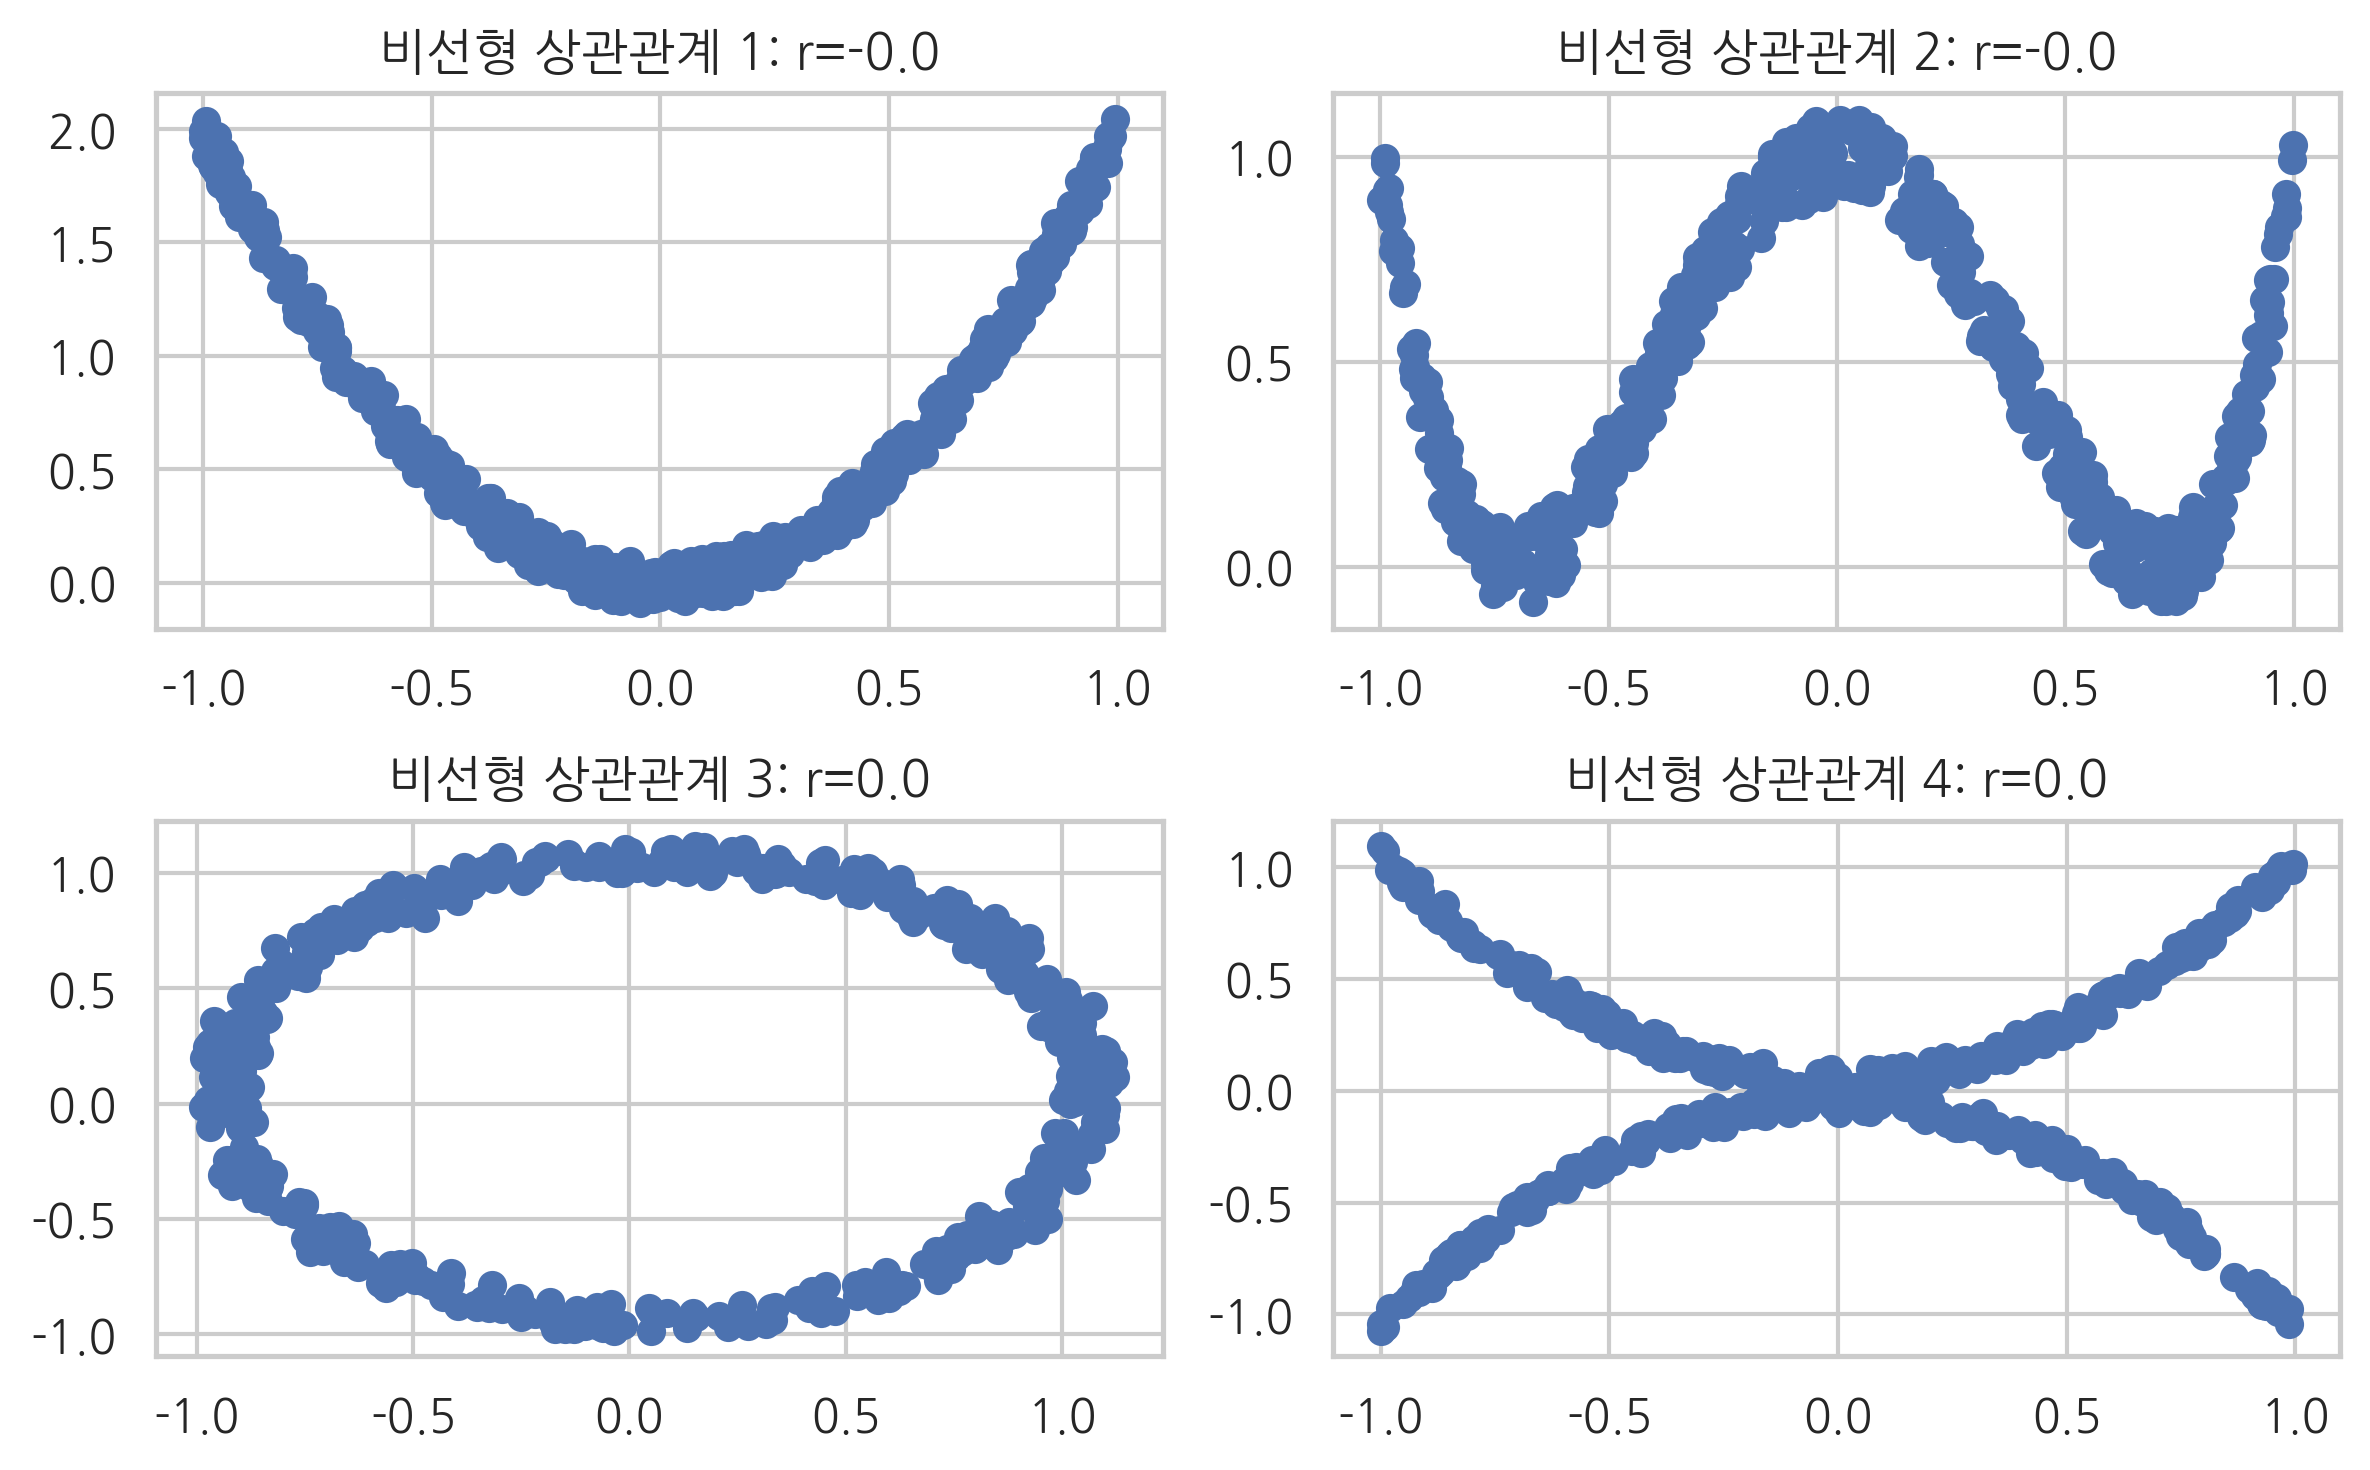

In [4]:
n = 500
np.random.seed(1)
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r"비선형 상관관계 1: r={:3.1f}".format(r1))
plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + 0.1 * np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r"비선형 상관관계 2: r={:3.1f}".format(r2))
plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r"비선형 상관관계 3: r={:3.1f}".format(r3))
plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4**2 + np.random.uniform(0, 0.1, n)) * \
    np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r"비선형 상관관계 4: r={:3.1f}".format(r4))
plt.tight_layout()
plt.show()

### 앤스콤 데이터

상관계수로 분포의 형상을 추측할 때 개별 자료가 상관계수에 미치는 영향력이 각각 다르다는 점에 유의해야 한다. 다음은 프랭크 앤스콤(Frank Anscombe)의 논문에 예시된 데이터다. 이 데이터는 서로 다른 4종류의 2차원 데이터셋을 포함하는데 4종류 데이터셋 모두 상관계수가 약 0.816로 동일하다. 

In [20]:
data = sm.datasets.get_rdataset("anscombe")
df = data.data
df[["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]]
%matplotlib inline

첫번째 데이터셋은 평범한 데이터셋이다. 하지만 두번째 데이터셋은 비선형으로 완벽한 상관관계를 가진다. 즉 x값을 알면 y값을 완벽하게 알 수 있다. 하지만 상관계수는 약 0.816으로 1인 아닌 값을 가진다. 즉, 상관계수는 비선형 상관관계를 표현하지 못한다.

세번째 데이터셋과 네번째 데이터셋에서 볼 수 있듯이 나머지 데이터의 상관계수가 1 또는 0인 경우에도 단 하나의 특이값(outlier) 자료에 의해 상관계수가 크게 달라질 수 있다.

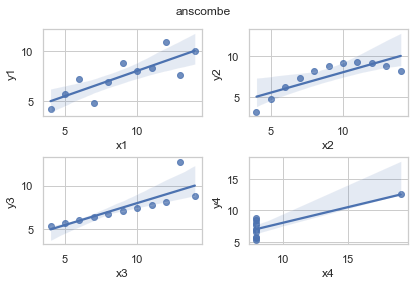

In [21]:
plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("anscombe")
plt.show()

### 다변수 확률변수의 표본공분산

이번에는 스칼라가 아닌 벡터 표본값을 가지는 다변수 확률변수의 공분산에 대해 알아보자. $X_1, X_2, \cdots, X_M$이라는 $M$개의 서로 다른 확률변수가 있다고 하자. 이 확률변수들의 표본 데이터가 각각 $N$개가 있으면 $j\;(j=1,\ldots,M)$번째 확률변수의 $i\;(i=1,\ldots,N)$번째 데이터를 $x_{i,j}$로 표기한다. 이를 하나의 행렬로 묶으면 다음과 같은 특징행렬이 된다.

$$
\begin{align}
X = 
\begin{bmatrix}
x_{1, 1} & x_{1, 2} & \cdots   & x_{1, M} \\
x_{2, 1} & x_{2, 2} & \cdots   & x_{2, M} \\
\vdots   & \vdots  & \ddots   & \vdots   \\
x_{N, 1} & x_{N, 2} & \cdots   & x_{N, M} \\
\end{bmatrix}
\tag{7.5.6}
\end{align}
$$


$M$개의 서로 다른 확률변수의 모든 조합에 대한 공분산을 한꺼번에 표기하기 위해 다음처럼 **표본공분산행렬(Sample Covariance Matrix)**을 정의한다. 대각성분은 각각의 확률변수의 분산, 비대각성분은 서로 다른 두 확률변수의 공분산으로 정의되는 행렬이다. 예를 들어 두번째 행, 세번째 열의 원소 $s_{2,3}$은 두번째 확률변수와 세번째 확률변수의 공분산이다.

$$
\begin{align}
S =
\begin{bmatrix}
s_{x_1}^2  & s_{x_1x_2} & \cdots & s_{x_1x_M} \\
s_{x_1x_2} & s_{x_2}^2  & \cdots & s_{x_2x_M} \\
\vdots     & \;\; \vdots& \ddots & \vdots \\
s_{x_1x_M} & s_{x_2x_M} & \cdots & s_{x_M}^2 \\
\end{bmatrix}
\tag{7.5.7}
\end{align}
$$


위 행렬의 값은 다음처럼 구한다.

(1) 각 확률변수 $x_j\,(j=1, \cdots, M)$의 표본평균을 계산한다.

$$
\begin{align}
\bar{x}_j = \dfrac{1}{N} \sum_{i=1}^N x_{i,j}
\tag{7.5.8}
\end{align}
$$

(2) 각 확률변수 $x_j\,(j=1, \cdots, M)$의 분산을 계산한다.

$$
\begin{align}
s_j^2 = \dfrac{1}{N} \sum_{i=1}^N (x_{i,j} - \bar{x}_j)^2
\tag{7.5.9}
\end{align}
$$

(3) 두 확률변수 $x_j, x_k$의 공분산을 계산한다.

$$
\begin{align}
s_{j,k} = \dfrac{1}{N} \sum_{i=1}^N (x_{i,j} - \bar{x}_j)(x_{i,k} - \bar{x}_k)
\tag{7.5.10}
\end{align}
$$




만약 $x_i (i=1,\ldots, N)$가 다음과 같은 $M$-차원 표본 벡터로 정의하면

$$
\begin{align}
x_i = \begin{bmatrix}x_{i,1} \\ \vdots \\ x_{i,M} \end{bmatrix}
\tag{7.5.11}
\end{align}
$$

표본공분산행렬 $S$는 다음 식으로 구할 수 있다.

$$
\begin{align}
S = \dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})(x_i-\bar{x})^T
\tag{7.5.12}
\end{align}
$$

#### 연습 문제 7.5.3

표본공분산행렬을 다음 식으로 구할 수 있음을 증명하라.

$$
\begin{align}
S = \dfrac{1}{N} X_0^TX_0
\tag{7.5.13}
\end{align}
$$

이 식에서 $\bar{x}$는 $M$-차원 평균벡터이고 $X_0$는 평균이 제거된 $N \times M$ 크기의 데이터 행렬이다.

$$
\begin{align}
\bar{x} = \dfrac{1}{N} X^T\mathbf{1_N}
\tag{7.5.14}
\end{align}
$$

$$
\begin{align}
X_0 = X - \mathbf{1_N}\bar{x}^T = X - \dfrac{1}{N} \mathbf{1_N}\mathbf{1_N}^TX
\tag{7.5.15}
\end{align}
$$


#### 연습 문제 7.5.4

붓꽃 데이터에서 4가지 확률변수의 표본공분산행렬을 구하라.

In [31]:
from sklearn.datasets import load_iris
X = load_iris().data
for i in range(len(X[0])):
    X[:,i] = X[:,i] - np.mean(X[:])
X.T@X / len(X)

array([[ 6.33997025,  1.04963427,  5.56964987, -0.11102635],
       [ 1.04963427,  0.39935564,  0.50289736, -0.24119146],
       [ 5.56964987,  0.50289736,  6.36877515,  0.81249967],
       [-0.11102635, -0.24119146,  0.81249967,  0.64590932]])

### 다변수 확률변수의 공분산

$M$개의 다변수 확률변수 벡터

$$ 
\begin{align}
X = 
\begin{bmatrix}
X_1 \\
X_2 \\
\vdots \\
X_M 
\end{bmatrix}
\tag{7.5.16}
\end{align}
$$
의 이론적 공분산행렬은 $\Sigma$로 표기하며 다음처럼 정의한다. 

$$ 
\begin{align}
\begin{aligned}
\Sigma = \text{Cov}[X] 
&=
\begin{bmatrix}
\sigma_{x_1}^2  &  \sigma_{x_1x_2} &  \sigma_{x_1x_3} &  \cdots &  \sigma_{x_1x_M} \\
\sigma_{x_1x_2} &  \sigma_{x_2}^2  &  \sigma_{x_2x_3} &  \cdots &  \sigma_{x_2x_M} \\
\vdots          &  \vdots          &  \vdots          &  \ddots &  \vdots          \\
\sigma_{x_1x_M} &  \sigma_{x_2x_M} &  \sigma_{x_3x_M} &  \cdots &  \sigma_{x_M}^2 \\
\end{bmatrix} \\
&=
\text{E} 
\begin{bmatrix}
(X_1 - \text{E}[X_1])^2                    & \cdots & (X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) \\
(X_1 - \text{E}[X_1])(X_2 - \text{E}[X_2]) & \cdots & (X_2 - \text{E}[X_2])(X_M - \text{E}[X_M]) \\
\vdots & \ddots &  \vdots  \\
(X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) & \cdots & (X_M - \text{E}[X_M])^2 
\end{bmatrix}
\end{aligned}
\tag{7.5.17}
\end{align}
$$

다음과 같이 표기할 수도 있다.

$$
\begin{align}
\begin{aligned}
\Sigma 
&= \text{E} \left[ (X - \text{E}[X])(X - \text{E}[X])^T \right] \\
&= \text{E} 
\left[ 
\begin{bmatrix}
X_1 - \text{E}[X_1] \\
X_2 - \text{E}[X_2] \\
\vdots \\
X_M - \text{E}[X_M] \\
\end{bmatrix}
\begin{bmatrix}
X_1 - \text{E}[X_1] &
X_2 - \text{E}[X_2] &
\cdots &
X_M - \text{E}[X_M]
\end{bmatrix}
\right]
\end{aligned}
\tag{7.5.18}
\end{align}
$$